یک سیگنال x(t) = rect(t/2) را در نظر بگیرید.  
۱. طیف فوریه این سیگنال را محاسبه و رسم کنید.  
۲. حالا سیگنال x(t) = rect(t/4) را در نظر بگیرید و طیف آن را محاسبه کنید.  
۳. توضیح دهید که افزایش پهنای باند چه تاثیری روی طیف دارد.


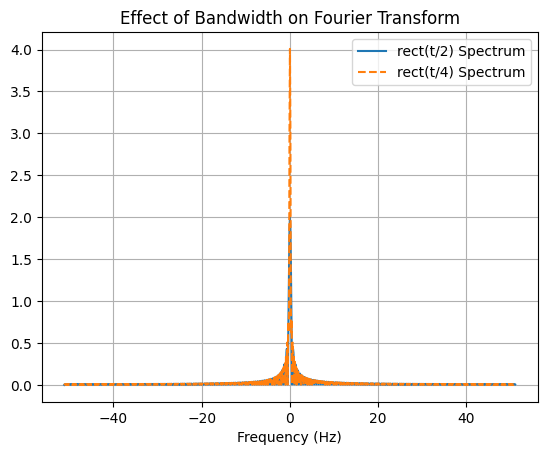

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

t = np.linspace(-5, 5, 1024)
dt = t[1] - t[0]
x1 = np.where(np.abs(t) <= 1, 1, 0)  # rect(t/2)
x2 = np.where(np.abs(t) <= 2, 1, 0)  # rect(t/4)

f = fftshift(fftfreq(len(t), dt))
X1 = fftshift(fft(x1)) * dt
X2 = fftshift(fft(x2)) * dt

plt.plot(f, np.abs(X1), label="rect(t/2) Spectrum")
plt.plot(f, np.abs(X2), '--', label="rect(t/4) Spectrum")
plt.title("Effect of Bandwidth on Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.show()


سیگنال x(t) = cos(2πt) را در نظر بگیرید.  
۱. این سیگنال را در دامنه زمان رسم کنید.  
۲. حال سیگنال x(t−1) را در نظر بگیرید.  
۳. بررسی کنید که تأخیر خطی چه تأثیری بر طیف فرکانسی دارد.


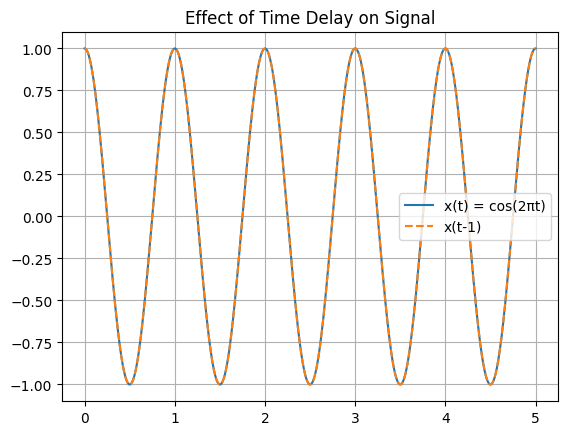

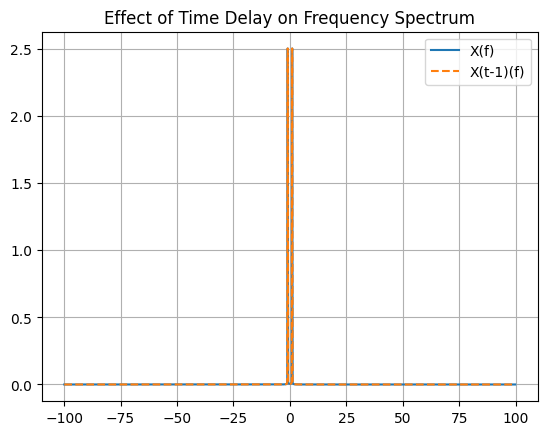

In [3]:
t = np.linspace(0, 5, 1000)
x = np.cos(2 * np.pi * t)
x_delayed = np.cos(2 * np.pi * (t - 1))

f = fftshift(fftfreq(len(t), t[1] - t[0]))
X = fftshift(fft(x)) * (t[1] - t[0])
X_delayed = fftshift(fft(x_delayed)) * (t[1] - t[0])

plt.plot(t, x, label="x(t) = cos(2πt)")
plt.plot(t, x_delayed, '--', label="x(t-1)")
plt.title("Effect of Time Delay on Signal")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(f, np.abs(X), label="X(f)")
plt.plot(f, np.abs(X_delayed), '--', label="X(t-1)(f)")
plt.title("Effect of Time Delay on Frequency Spectrum")
plt.legend()
plt.grid(True)
plt.show()


سیگنال x(t) = cos(2πt) را در نظر بگیرید.  
۱. این سیگنال را در دامنه زمان رسم کنید.  
۲. سپس سیگنال x[n] = cos(2πn) (گسسته) را محاسبه و رسم کنید.  
۳. تفاوت‌ها و شباهت‌های موجود بین سیگنال پیوسته و گسسته را بررسی کنید.


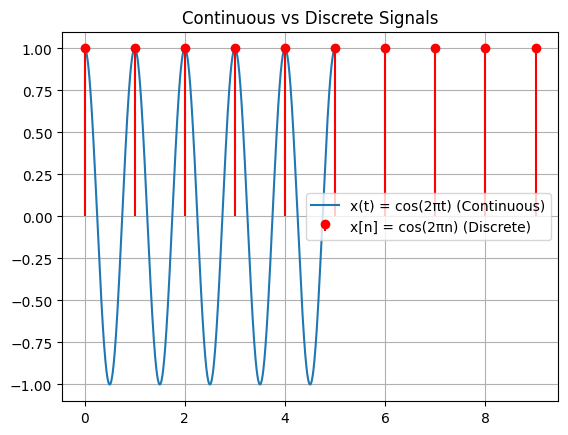

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 5, 1000)
n = np.arange(0, 10)
x_continuous = np.cos(2 * np.pi * t)
x_discrete = np.cos(2 * np.pi * n)

plt.plot(t, x_continuous, label="x(t) = cos(2πt) (Continuous)")
plt.stem(n, x_discrete, 'r', label="x[n] = cos(2πn) (Discrete)", basefmt=" ")
plt.title("Continuous vs Discrete Signals")
plt.legend()
plt.grid(True)
plt.show()


یک سیگنال x(t) = cos(2πt) را در نظر بگیرید.  
۱. سیگنال اصلی را رسم کنید.  
۲. فیلتر بالاگذر با فرکانس برش 1Hz را به این سیگنال اعمال کنید.  
۳. سیگنال خروجی از فیلتر بالاگذر را رسم کنید.


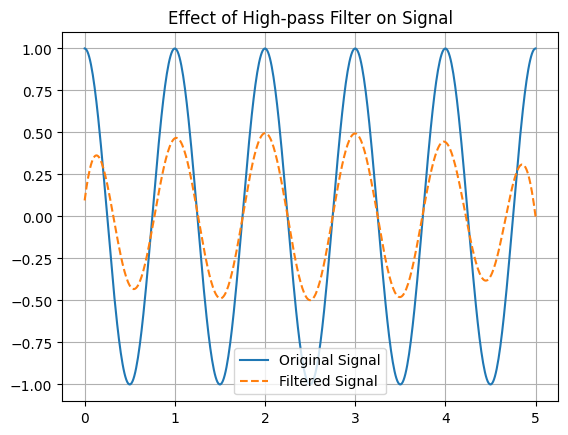

In [6]:
from scipy.signal import butter, filtfilt

# تعریف فیلتر بالاگذر
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# پارامترها
fs = 100  # نرخ نمونه‌برداری
cutoff = 1  # فرکانس برش (1Hz)
order = 5  # درجه فیلتر

b, a = butter_highpass(cutoff, fs, order)

# سیگنال ورودی
t = np.linspace(0, 5, fs*5)
x = np.cos(2 * np.pi * t)

# فیلتر کردن سیگنال
y = filtfilt(b, a, x)

# رسم نتایج
plt.plot(t, x, label="Original Signal")
plt.plot(t, y, '--', label="Filtered Signal")
plt.title("Effect of High-pass Filter on Signal")
plt.legend()
plt.grid(True)
plt.show()



سیگنال پیچیده x(t) = e^(j2πt) را در نظر بگیرید.
۱. این سیگنال را در دامنه زمان رسم کنید.
۲. طیف فوریه این سیگنال را محاسبه کرده و رسم کنید.
۳. اثر فرکانس پیچیده را بر طیف فرکانسی تحلیل کنید.


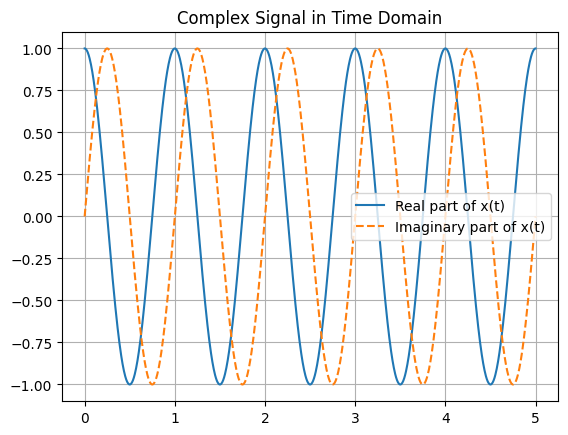

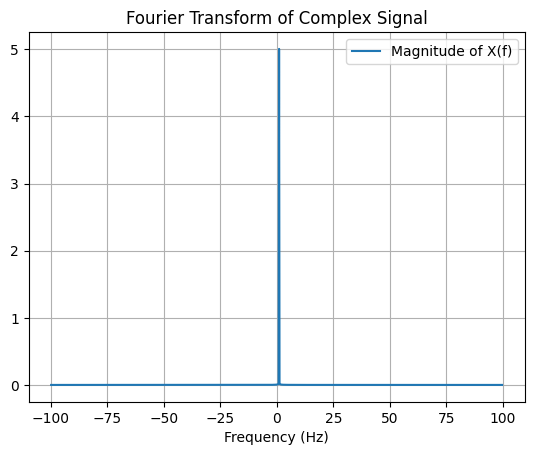

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

t = np.linspace(0, 5, 1000)
x_complex = np.exp(1j * 2 * np.pi * t)

# طیف فوریه
dt = t[1] - t[0]
f = fftshift(fftfreq(len(t), dt))
X_complex = fftshift(fft(x_complex)) * dt

# رسم سیگنال و طیف فوریه
plt.plot(t, np.real(x_complex), label="Real part of x(t)")
plt.plot(t, np.imag(x_complex), '--', label="Imaginary part of x(t)")
plt.title("Complex Signal in Time Domain")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(f, np.abs(X_complex), label="Magnitude of X(f)")
plt.title("Fourier Transform of Complex Signal")
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.grid(True)
plt.show()
